#Loading the Dataset

link for the dataset: https://drive.google.com/file/d/1hL-zgI69Agp_YADulY5zCdJ-_uSEBb68/view?usp=sharing

In [29]:
from google.colab import drive
drive.mount("/content/drive",force_remount = True)

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/images.csv")

Mounted at /content/drive


#EDA

In [30]:
df.head(3)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2264,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,14,15,10,15,14,59,9,69,151,125,132,120,121,89,76,92,120,131,145,148,149,160,164,161,162,151,145,136,131,124,114,103,97,93,83,80,77,77,74,69,...,83,73,88,151,162,177,148,129,95,38,31,20,21,19,26,30,36,39,45,61,69,55,62,73,71,63,58,58,54,48,49,59,55,61,69,53,45,40,35,12
1,4,2,13,88,113,109,125,128,139,148,150,158,169,174,182,191,196,202,206,207,205,203,204,208,207,210,209,208,205,201,198,193,193,185,180,177,165,157,151,139,...,150,158,170,164,152,160,130,83,61,69,76,78,81,87,90,89,90,85,80,78,79,67,59,76,103,125,129,138,143,134,134,131,110,94,68,44,20,24,31,26
2,194,73,53,40,35,38,44,34,26,22,23,22,40,38,52,58,23,24,27,18,24,27,22,23,41,45,40,30,25,27,22,28,23,32,26,29,25,32,32,29,...,130,124,119,114,108,108,112,113,108,108,116,120,119,121,123,120,120,120,113,102,71,30,12,11,11,9,12,11,13,14,45,17,13,17,19,15,16,19,19,17


In [31]:
df.shape

(4965, 2304)

In [32]:
import math as m 
IMG_dim= int(m.sqrt(2304))
#our image is 48x48
IMG_dim

48

In [33]:
import numpy as np
image1=np.asarray(df.iloc[0])
image1=image1.reshape(IMG_dim,IMG_dim)

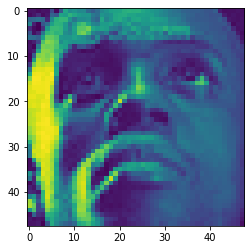

In [34]:
from matplotlib import pyplot as plt
plt.imshow(image1)
plt.show()

#normalizing and standarizing

In [35]:
#calculating means
df_center=df.copy()
means=[]
for col in df.columns:
  means.append(sum(df[col])/df.shape[0])
len(means)

2304

In [36]:
#normalizing (might take some time :p)
for i in range(df.shape[1]):
  df_center.iloc[:,i] = df_center.iloc[:,i] - means[i]

Pixel values are from 0 to 255 so there is no need to scale them down (dividing by Standard deviation)

#Covariance matrix

In [37]:
cov=np.matmul(np.transpose(df_center.values),df_center.values)

#SVD 

In [38]:
u, s, vh = np.linalg.svd(cov)

#sorting our eigenvalues and eigenvectors

In [40]:
def bubbleSort(u,s):
    n = len(s)
    for i in range(n):
        for j in range(0, n-i-1):
            if s[j] < s[j+1] :
                s[j], s[j+1] = s[j+1], s[j]
                u[:,j],u[:,j+1] = u[:,j+1],u[:,j]

#Applying PCA

Now we will apply PCA to obtain the first 10 principal components, report the proportion of
variance explained (PVE) for each of the principal components, reshape each of the principal component
to a 48x48 matrix and show them (eigenfaces).

In [41]:
def get_PC(u,s,k):
  return u[:,k] , (s[k]/np.sum(s))*100

PCA 1 has PVE of 28.33%


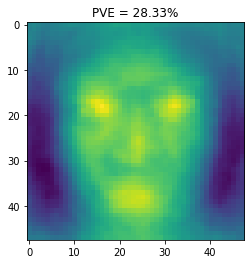

PCA 2 has PVE of 11.03%


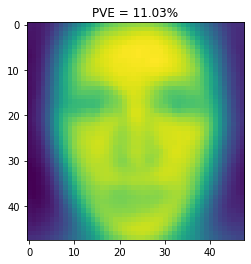

PCA 3 has PVE of 9.77%


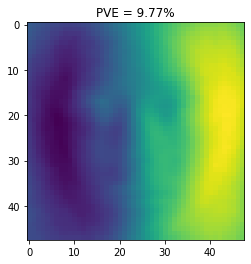

PCA 4 has PVE of 6.10%


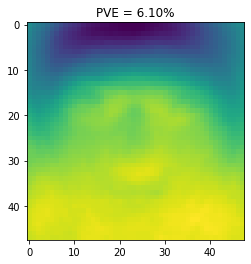

PCA 5 has PVE of 3.22%


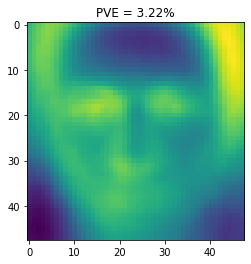

PCA 6 has PVE of 2.86%


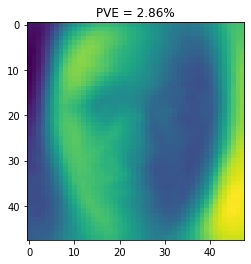

PCA 7 has PVE of 2.10%


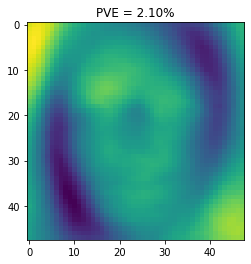

PCA 8 has PVE of 2.05%


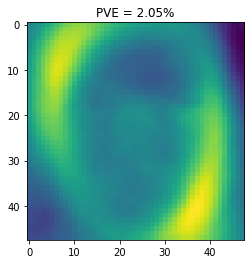

PCA 9 has PVE of 1.84%


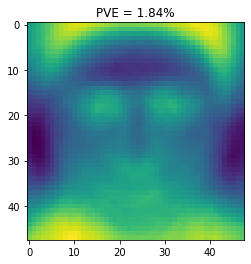

PCA 10 has PVE of 1.41%


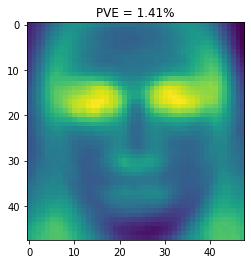

In [42]:
n=IMG_dim
sum=0
for i in range(10):
  plt.figure()
  image,PVE = get_PC(u,s,i)
  sum+=PVE
  print('PCA {a} has PVE of {b:.2f}%'.format(a=i+1,b=PVE))
  image=image.reshape(n,n)
  plt.title("PVE = {b:.2f}%".format(b=PVE))
  plt.imshow(image)
  path =str(i)+".png"
  #plt.savefig("/content/drive/MyDrive/pics/"+path)
  plt.show()

#Number of PCs used vs PVE

We will now obtain first k principal components and report PVE for k ∈ {1, 10, 50, 100, 500}.

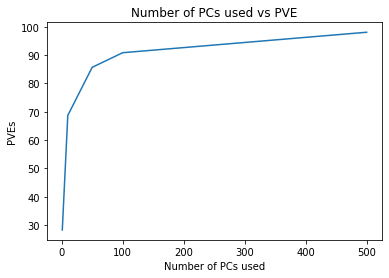

In [43]:
def plot():
  ks=[1, 10, 50, 100, 500]
  PVEs=[]
  for k in ks:
    sum=0
    for i in range(k):
      noNeed,PVE = get_PC(u,s,i)
      sum+=PVE
    PVEs.append(round(sum,2))

  plt.plot(ks,PVEs)
  plt.xlabel("Number of PCs used")
  plt.ylabel("PVEs")
  plt.title("Number of PCs used vs PVE")
  plt.show()

plot()

#Reconstructing Image 

We will now reconstruct an image using the principal components we obtained previously. we will use first k principal components to analyze and reconstruct the first image in the
dataset where k ∈ [1, 10, 50, 100, 500]. 

In [44]:
ks=[1, 10, 50, 100, 500]
image1=df.iloc[0,:]
def reconstruct(k): 
  new_image = np.array([0 for i in range(2304)])
  for i in range(k):
    PCA,PVE = get_PC(u,s,i)
    new_image = new_image + np.sum(np.dot(image1,PCA)) * PCA
  return new_image

using 1 eigenfaces to reconstruct the image


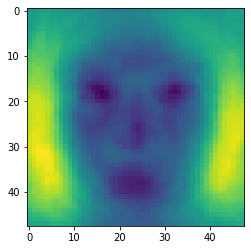

using 10 eigenfaces to reconstruct the image


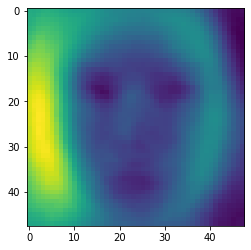

using 50 eigenfaces to reconstruct the image


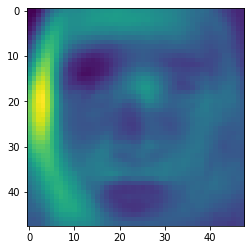

using 100 eigenfaces to reconstruct the image


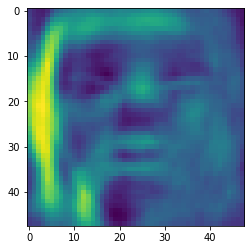

using 500 eigenfaces to reconstruct the image


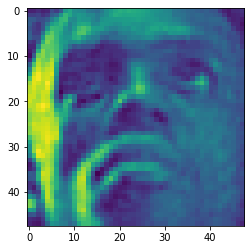

In [45]:
from matplotlib import pyplot as plt
for k in ks:
  a = reconstruct(k)
  n=len(a)
  print("using {kk} eigenfaces to reconstruct the image".format(kk=k))
  plt.imshow(a.reshape(int(m.sqrt(n)),int(m.sqrt(n))))
  path =str(k)+".png"
  plt.savefig("/content/drive/MyDrive/pics/"+path)
  plt.show()

#PCA using scikit learn

In [46]:
from sklearn.preprocessing import StandardScaler
x = df.values
x = StandardScaler().fit_transform(x) # normalizing the features

In [47]:
np.mean(x),np.std(x)

(3.403839193770761e-19, 0.9999999999999996)

In [48]:
new_df = pd.DataFrame(x,columns=df.columns)
new_df.head(5)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_2264,pixel_2265,pixel_2266,pixel_2267,pixel_2268,pixel_2269,pixel_2270,pixel_2271,pixel_2272,pixel_2273,pixel_2274,pixel_2275,pixel_2276,pixel_2277,pixel_2278,pixel_2279,pixel_2280,pixel_2281,pixel_2282,pixel_2283,pixel_2284,pixel_2285,pixel_2286,pixel_2287,pixel_2288,pixel_2289,pixel_2290,pixel_2291,pixel_2292,pixel_2293,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,-1.190015,-1.149463,-1.184672,-1.104766,-1.108970,-0.491779,-1.202832,-0.364491,0.815811,0.415267,0.501215,0.284444,0.253812,-0.265303,-0.503346,-0.310019,0.068740,0.208361,0.393706,0.420116,0.415834,0.569389,0.620789,0.569274,0.586030,0.432355,0.351414,0.227818,0.169249,0.083945,-0.038951,-0.169939,-0.228212,-0.248669,-0.344492,-0.343393,-0.349497,-0.304954,-0.311801,-0.362121,...,-0.314856,-0.453121,-0.235927,0.680615,0.845890,1.073958,0.625277,0.308560,-0.284110,-1.250686,-1.416059,-1.661008,-1.691182,-1.753455,-1.644320,-1.586075,-1.472234,-1.413180,-1.303953,-1.011300,-0.841613,-1.041101,-0.868040,-0.635977,-0.626143,-0.711103,-0.747691,-0.716057,-0.748874,-0.818964,-0.789659,-0.635038,-0.689264,-0.600482,-0.495927,-0.716006,-0.832041,-0.908328,-0.980977,-1.286086
1,-1.315174,-1.314731,-1.146114,-0.143852,0.228223,0.200877,0.436233,0.485931,0.640505,0.753469,0.769028,0.850464,0.969433,1.005317,1.080887,1.172631,1.202307,1.269783,1.304816,1.304058,1.251983,1.208047,1.213716,1.265559,1.251196,1.306522,1.302420,1.299036,1.275878,1.240143,1.223192,1.176038,1.211829,1.137860,1.112383,1.115406,0.975366,0.892682,0.840387,0.668077,...,0.618784,0.753680,0.950513,0.872743,0.695678,0.813900,0.344758,-0.423260,-0.836008,-0.744087,-0.673334,-0.688472,-0.672954,-0.590216,-0.545592,-0.569179,-0.546550,-0.625668,-0.703026,-0.719442,-0.670814,-0.838366,-0.917636,-0.586749,-0.108042,0.272380,0.355620,0.520660,0.598236,0.459561,0.449280,0.391796,0.079298,-0.147057,-0.509447,-0.836270,-1.162151,-1.117020,-1.032804,-1.106408
2,1.062844,-0.412115,-0.631999,-0.775686,-0.825323,-0.782695,-0.708287,-0.868980,-1.010293,-1.099292,-1.120541,-1.175291,-0.953798,-1.027675,-0.862040,-0.819212,-1.378050,-1.391246,-1.368769,-1.527552,-1.450570,-1.405997,-1.484104,-1.475138,-1.202526,-1.138182,-1.208831,-1.349253,-1.415923,-1.372564,-1.421299,-1.291586,-1.338244,-1.167999,-1.200593,-1.110390,-1.132371,-0.978624,-0.940267,-0.950806,...,0.340085,0.270960,0.212605,0.133789,0.034747,0.018431,0.064240,0.054014,-0.073090,-0.106754,-0.013134,0.015778,-0.028076,-0.008596,0.020940,-0.034877,-0.032282,-0.026475,-0.136438,-0.307408,-0.807453,-1.463464,-1.694648,-1.653347,-1.597583,-1.567684,-1.462512,-1.442628,-1.369453,-1.324428,-0.847962,-1.234025,-1.276166,-1.205049,-1.171925,-1.223785,-1.214969,-1.182236,-1.188284,-1.221915
3,1.213035,1.215135,1.321638,1.356755,1.335797,1.433806,1.566623,1.595805,1.692341,1.091671,-0.941999,-1.488092,-1.445787,-1.595717,-1.549538,-1.672860,-1.706188,-1.660339,-1.772047,-1.782247,-1.793988,-1.777310,-1.795391,-1.801059,-1.690314,-1.760471,-1.743772,-1.780715,-1.670149,-1.672875,-1.631657,-1.321497,-1.503249,-1.514631,-1.365806,-1.456291,-0.138724,1.341795,1.034912,1.036005,...,-1.332106,-1.390167,-0.322740,1.050092,0.785805,0.125513,-0.792901,-1.632354,-1.680088,-1.593865,-1.713149,-1.744848,-1.385714,-0.881026,-1.026286,-1.017302,-0.820827,-0.403111,0.155440,0.860023,1.259211,1.273449,1.297673,1.267492,1.300545,2.318659,0.153606,-1.009777,-0.309928,0.043297,0.041159,0.006733,-0.102362,0.045305,0.044870,0.059024,-0.066187,-0.217036,-0.242443,-0.400531
4,1.400773,1.456680,1.463019,1.488387,1.538402,1.516924,1.453584,1.408424,1.502426,1.385760,1.3344

In [49]:
from sklearn.decomposition import PCA
pca_img = PCA(n_components=10)
principalComponents = pca_img.fit_transform(x)

In [50]:
principalComponents.shape

(4965, 10)

In [ ]:
principalComponents

In [27]:
df.shape

(4965, 2304)

In [53]:
for i in range(len(pca_img.explained_variance_ratio_)):
  print('Explained variance for principal component {i}: {e}'.format(i=i+1,e=pca_img.explained_variance_ratio_[i]))

Explained variance for principal component 1: 0.29189808654988536
Explained variance for principal component 2: 0.10243198805377692
Explained variance for principal component 3: 0.09558134987656457
Explained variance for principal component 4: 0.06020683079216669
Explained variance for principal component 5: 0.02810432453631806
Explained variance for principal component 6: 0.025456633658669778
Explained variance for principal component 7: 0.02086235463513124
Explained variance for principal component 8: 0.01856706742141942
Explained variance for principal component 9: 0.01727191789743208
Explained variance for principal component 10: 0.014708898888304643
